In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-object-detection/data/sample_submission.csv
/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv
/kaggle/input/car-object-detection/data/testing_images/vid_5_26420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31520.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29420.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_31720.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_26560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_27840.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_28360.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29560.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_29020.jpg
/kaggle/input/car-object-detection/data/testing_images/vid_5_30720.jpg
/kaggle/

**Basic operations on images**

In [2]:
!pip list | grep opencv

opencv-contrib-python                    4.9.0.80
opencv-python                            4.9.0.80
opencv-python-headless                   4.9.0.80


In [3]:
!pip install scikit-image

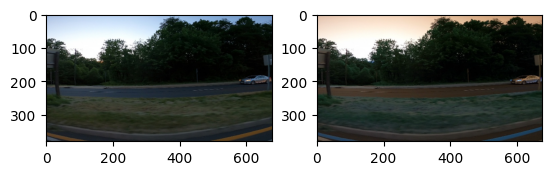

In [4]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read an image 
image = io.imread ('/kaggle/input/car-object-detection/data/testing_images/vid_5_26880.jpg')

# split the loaded image into its three channels (b, g, r)
b, g, r = cv2.split (image)
img_matplotlib = cv2.merge ([r, g, b])

# show both images using matplotlib
plt.subplot (121)  # show image in wrong color
plt.imshow (image)

# show image in true color
plt.subplot (122)
plt.imshow (img_matplotlib)
plt.show ()

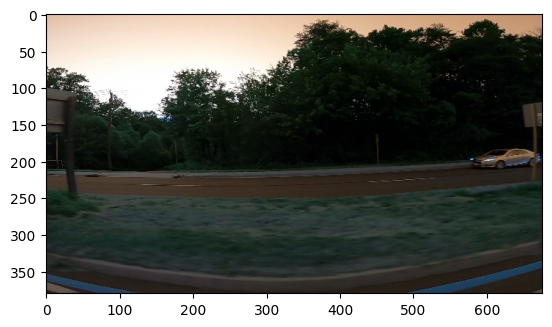

In [5]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

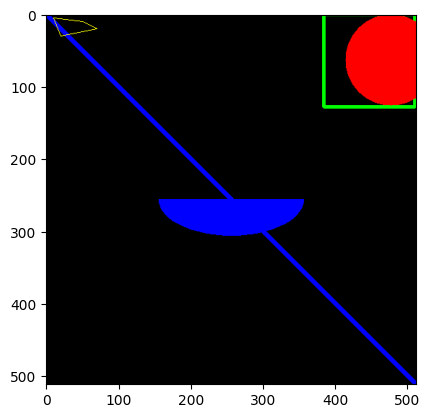

In [6]:
# create a black image
img = np.zeros ((512, 512, 3), np.uint8)

# draw a diagonal blue line with thickness of 5 px
img = cv2.line (img, (0,0), (511, 511), (255, 0, 0), 5)

# drawning rectangle
img = cv2.rectangle (img, (384, 0), (510, 128), (0, 255, 0), 3)

# drawning circle
img = cv2.circle (img, (477, 63), 63, (0, 0, 255), -1)

# drawning ellipse
img = cv2.ellipse (img, (256, 256), (100, 50), 0, 0, 180, 255, -1)

# drawning polygon
pts = np.array ([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape ((-1, 1, 2))
img = cv2.polylines (img, [pts], True, (0, 255, 255))

plt.imshow (cv2.cvtColor (img, cv2.COLOR_BGR2RGB))

In [7]:
# acessing and modiying pixel values
px = img [100, 100]
print (px)
image [100, 100] = [255, 255, 255]
print (img [100, 100])

[255   0   0]
[255   0   0]


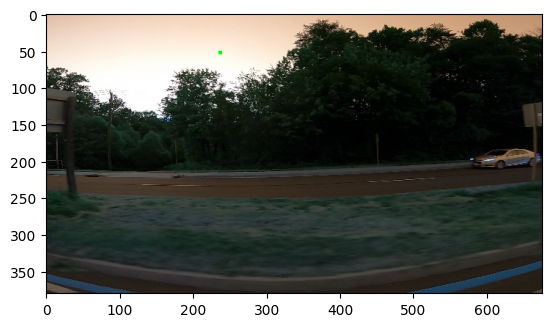

In [8]:
# changing pixel values
for i in range (5):
    for j in range (5):
        image[50 + i, 235 + j] = (0, 255, 0)
        
plt.imshow (image)

In [9]:
# accessing image properties
print (image.shape)
print (image.size)
print (image.dtype)

(380, 676, 3)
770640
uint8


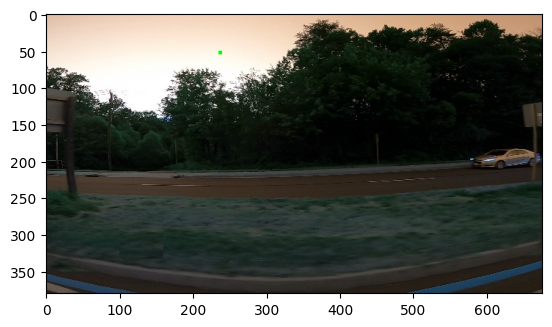

In [10]:
# image ROI
car = image [280:340, 330:390]
image [273:333, 100:160] = car
plt.imshow (image)

In [11]:
# splitting and merging image channels
b, g, r = cv2.split (image)
image = cv2.merge ((b, g, r))

print (r)

[[164 164 164 ... 111 111 111]
 [164 165 165 ... 111 112 112]
 [165 166 166 ... 112 112 111]
 ...
 [ 27  24  26 ...  60  61  62]
 [ 28  28  31 ...  57  57  59]
 [ 28  28  30 ...  56  58  59]]


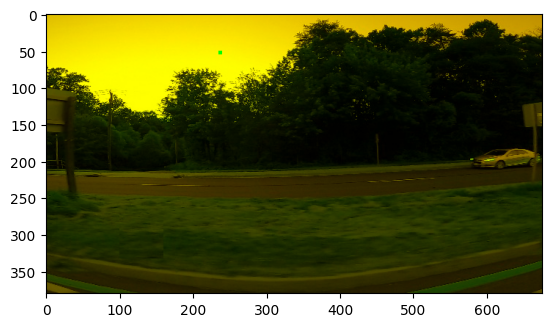

In [12]:
# set all the red pixels to zero using numpy indexing
image [:, :, 2] = 0

plt.imshow (image)

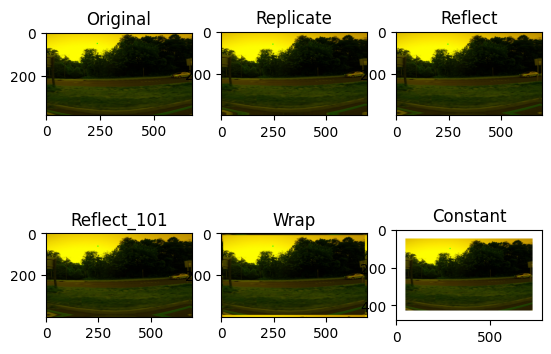

In [13]:
# making borders for images (padding)
replicate = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder (image, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder (image, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value = [255, 255, 255])

plt.subplot (231), plt.imshow (image), plt.title ("Original")
plt.subplot (232), plt.imshow (replicate), plt.title ('Replicate')
plt.subplot (233), plt.imshow (reflect), plt.title ('Reflect')
plt.subplot (234), plt.imshow (reflect101), plt.title ('Reflect_101')
plt.subplot (235), plt.imshow (wrap), plt.title ('Wrap')
plt.subplot (236), plt.imshow (constant), plt.title ('Constant')

plt.show ()

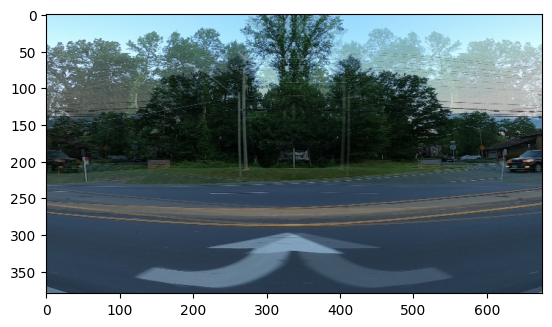

In [14]:
# image addition
img1 = io.imread ('/kaggle/input/car-object-detection/data/training_images/vid_4_10960.jpg')
img2 = cv2.flip (img1, 1)

dst = cv2.addWeighted (img1, 0.7, img2, 0.3, 0)

plt.imshow (dst)

**Geometric transformations of images**

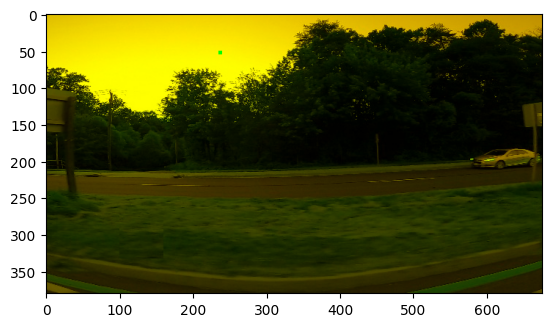

In [15]:
image = image.copy ()
plt.imshow (image)
plt.show ()

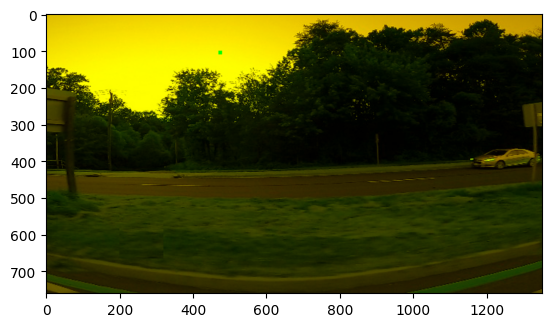

In [16]:
# scaling 
res = cv2.resize (image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
plt.imshow (res)

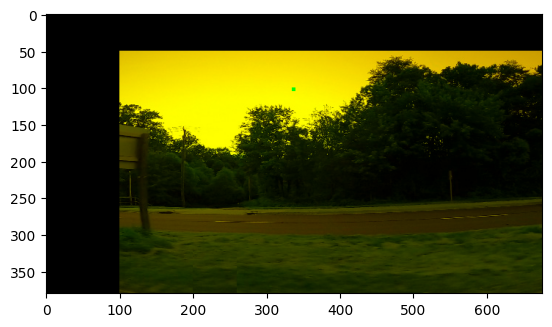

In [17]:
rows, cols, ch = image.shape

# translation
M = np.float32 ([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine (image, M, (cols, rows))

plt.imshow (dst)

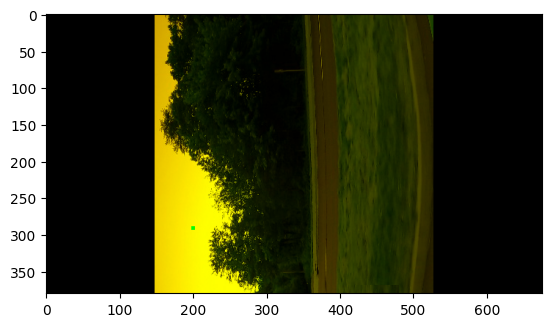

In [18]:
# rotation
M = cv2.getRotationMatrix2D ((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine (image, M, (cols, rows))

plt.imshow (dst)

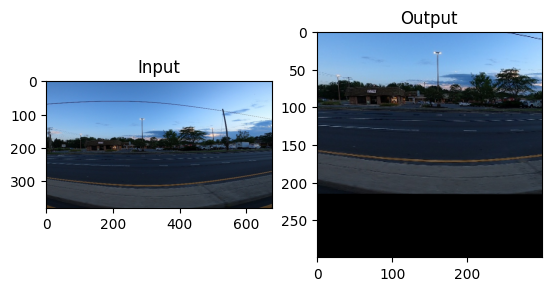

In [19]:
# perspective transfromation
img = io.imread ('/kaggle/input/car-object-detection/data/training_images/vid_4_16580.jpg')
rows, cols, ch = img.shape
pts1 = np.float32 ([[73, 86], [486, 69], [35, 514], [520, 522]])
pts2 = np.float32 ([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform (pts1, pts2)
dst = cv2.warpPerspective (img, M, (300, 300))
plt.subplot (121), plt.imshow (img), plt.title ('Input')
plt.subplot (122), plt.imshow (dst), plt.title ('Output')
plt.show ()

**Image thresholding**

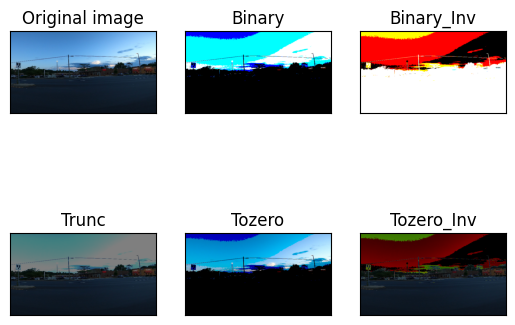

In [20]:
# simple thresholding
img = io.imread ('/kaggle/input/car-object-detection/data/training_images/vid_4_16900.jpg')
ret, thresh1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold (img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold (img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original image', 'Binary', 'Binary_Inv', 'Trunc', 'Tozero', 'Tozero_Inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range (6):
    plt.subplot (2, 3, i + 1)
    plt.imshow (images [i], 'gray')
    plt.title (titles [i])
    plt.xticks ([]), plt.yticks ([])
    
plt.show ()

**Adaptive Image Thresholding** - adaptive thresholding can segment an image by setting all pixels whose intensity values are above a threshold to a foreground value and all the remaining pixels to a background value. The basic idea of adaptive thresholding is to use different threshold values for different regions of the image, rather than using a global threshold value for the entire image. This allows for the algorithm to take into account variations in the image's lightning and texture to produce a more accurate binary representation of the image.

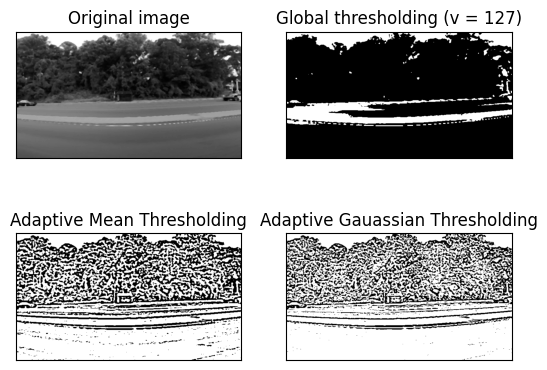

In [21]:
# adaptive thresholding
img = io.imread ('/kaggle/input/car-object-detection/data/training_images/vid_4_1940.jpg')
img = cv2.cvtColor (img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur (img, 5)

ret, th1 = cv2.threshold (img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 2)
th3 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original image', 'Global thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gauassian Thresholding']
images = [img, th1, th2, th3]

for i in range (4):
    plt.subplot (2, 2, i + 1), plt.imshow (images [i], 'gray')
    plt.title (titles [i])
    plt.xticks ([]), plt.yticks ([])
plt.show ()

**2D convolution (Image Filtering)** - as in one-dimensional signals, images can be filtered with low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images. OpenCV provides a function cv.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A $5 \times 5 $ averaging filter kernel will look like the below:
$$ K = \frac{1}{25}\begin {bmatrix} 
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end {bmatrix}$$
This operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image. 

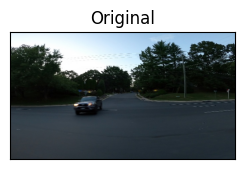

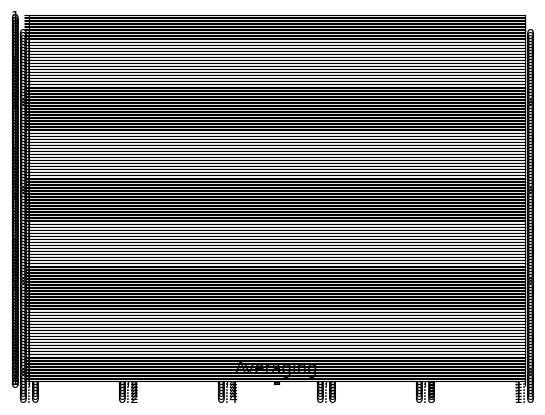

In [22]:
# 2D convolution 
img = io.imread ('/kaggle/input/car-object-detection/data/testing_images/vid_5_29820.jpg')

kernel = np.ones ((5, 5), np.float32)/25
dst = cv2.filter2D (img, -1, kernel)

plt.subplot (121), plt.imshow (img), plt.title ('Original')
plt.xticks ([]), plt.yticks ([])
plt.subplots (122), plt.imshow (dst), plt.title ('Averaging')
plt.xticks ([]), plt.yticks ([])
plt.show ()

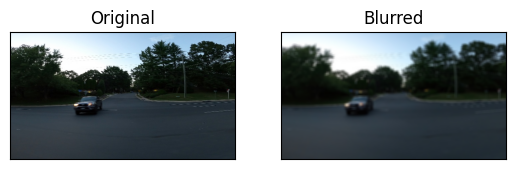

In [23]:
# image blurring (image smoothing)
blur = cv2.blur (img, (9, 9))

plt.subplot (121), plt.imshow (img), plt.title ('Original')
plt.xticks ([]), plt.yticks ([])
plt.subplot (122), plt.imshow (blur), plt.title ('Blurred')
plt.xticks ([]), plt.yticks ([])
plt.show ()

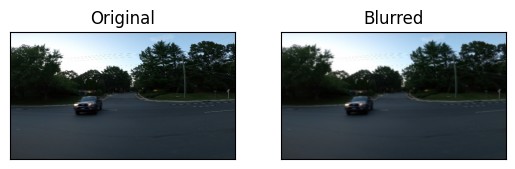

In [24]:
# image blurring with Gaussian Filtering (image smoothing)
blur = cv2.GaussianBlur (img, (5, 5), 0)

plt.subplot (121), plt.imshow (img), plt.title ('Original')
plt.xticks ([]), plt.yticks ([])
plt.subplot (122), plt.imshow (blur), plt.title ('Blurred')
plt.xticks ([]), plt.yticks ([])
plt.show ()

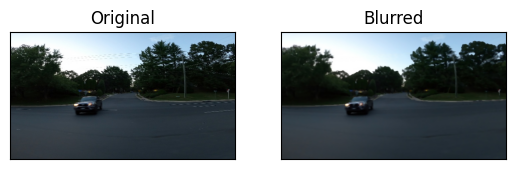

In [25]:
# image blurring with Median Filtering (highly effective in removing salt-and-pepper noise)
blur = cv2.medianBlur (img, 5)

plt.subplot (121), plt.imshow (img), plt.title ('Original')
plt.xticks ([]), plt.yticks ([])
plt.subplot (122), plt.imshow (blur), plt.title ('Blurred')
plt.xticks ([]), plt.yticks ([])
plt.show ()

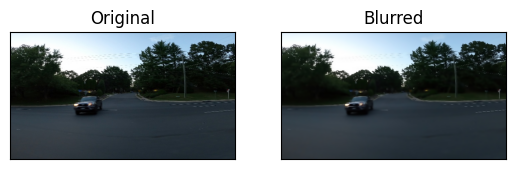

In [26]:
# image blurring with Bilateral Filtering
blur = cv2.bilateralFilter (img, 9, 75, 75)

plt.subplot (121), plt.imshow (img), plt.title ('Original')
plt.xticks ([]), plt.yticks ([])
plt.subplot (122), plt.imshow (blur), plt.title ('Blurred')
plt.xticks ([]), plt.yticks ([])
plt.show ()

**Morphological transformations** - are some simple operations based on the image shape. It is normally performed on binary images. It need two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation 

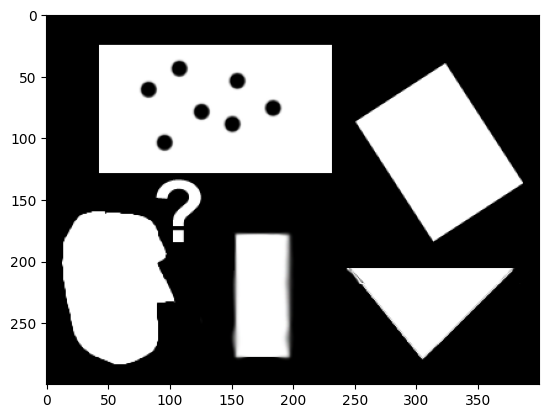

In [27]:
img = io.imread ('https://github.com/opencv/opencv/blob/master/samples/data/pic1.png?raw=true')
img = np.invert (img)
plt.imshow (img)

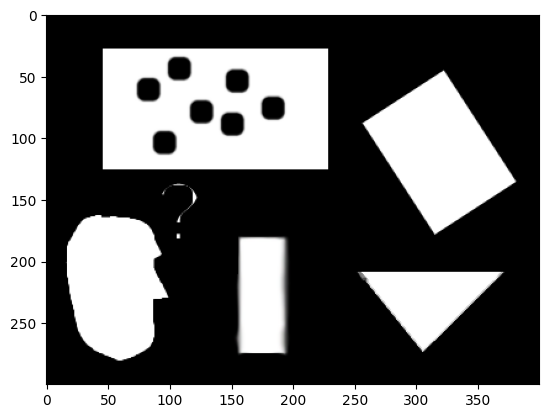

In [28]:
# erosion
kernel = np.ones ((7, 7), np.uint8)
erosion = cv2.erode (img, kernel, iterations = 1)

plt.imshow (cv2.cvtColor (erosion, cv2.COLOR_BGR2RGB))

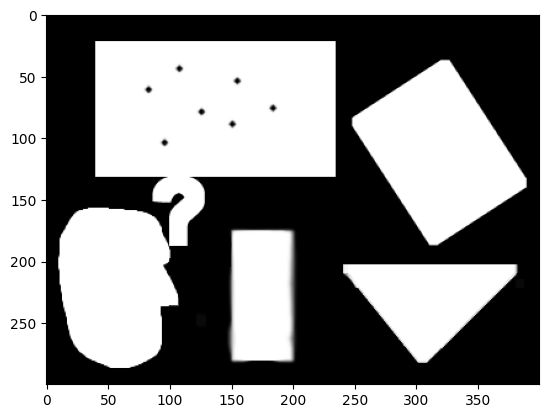

In [29]:
# dilation
kernel = np.ones ((7, 7), np.uint8)
dilation = cv2.dilate (img, kernel, iterations = 1)

plt.imshow (cv2.cvtColor (dilation, cv2.COLOR_BGR2RGB))

**Canny edge detection** is a popular edge detection algorithm. It was developed by John F. Canny in 
1. It is a multi-stage algorithm and we will go through each stages
2. Noise reduction - since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a $ 5 \times 5 $ Gaussian filter.
3. Finding intensity gradient of the image - smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction $(G_x)$ and vertical direction $(G_y)$. From these two images, we can find edge gradient and direction for each pixel as follows:
$$ EdgeGradient (G) = \sqrt{G_x^2 + G_y^2} Angle (\theta) = \tan^{-1} (\frac{G_y}{G_x}) $$
Gradient direction is always perpindicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions. 
OpenCV puts all above in single function, cv.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Fourth agrument is aperture_size. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: $ EdgeGradient (G) = |G_x| + |G_y|$. By default, it is False

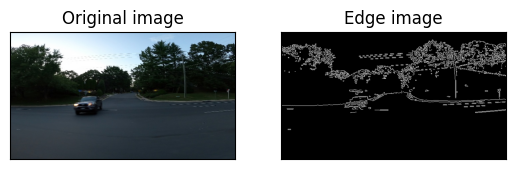

In [30]:
# Canny edge detection
img1 = io.imread ('/kaggle/input/car-object-detection/data/testing_images/vid_5_29820.jpg')
edges = cv2.Canny (img1, 100, 200)

plt.subplot (121), plt.imshow (img1, cmap = 'gray')
plt.title ('Original image'), plt.xticks ([]), plt.yticks ([])
plt.subplot (122), plt.imshow (edges, cmap = 'gray')
plt.title ('Edge image'), plt.xticks ([]), plt.yticks ([])

plt.show ()